# Reinforcement learning live project

In this liveProject, we will take on the role of an artificial intelligence engineer at Okanogan, a fictional online retail company. Okanogan has several warehouses in which products need to be moved throughout the day for storage and delivery.

In order to boost efficiency and create a better work environment for its employees, Okanogan has decided to invest in automation solutions for item placement and retrieval. The project manager for this initiative has decided that autonomous robotic carts are the best option and is looking to evaluate various control schemes. The first two requirements for this project have been provided as follows:

1. Given an item and a target location in the warehouse, the robot must be able to navigate to that location and deposit the item.
2. The robot must not bump or crash into any of the item shelves.

Our job will be to investigate whether a reinforcement learning (RL) approach could be a viable option to satisfy these requirements.

Adopting a stepwise approach, we will proceed as follows:

- Understand what constitutes an RL problem.
- Approach the first requirement with tabular Q-learning.
- Begin working on the second requirement by leveraging neural networks.
- Finish the second requirement using the deep Q-network model.
- Create our own simulation environment for a custom RL problem.

*This live project is a quided graded project from Manning Publications, here is the [link](https://www.manning.com/liveproject/deep-reinforcement-learning-for-self-driving-robots)*

# Step 1: Addressing a Reinforcement Learning Problem

## Objectives

- Understand the key components of a reinforcement learning solution.
- Recognize what problems can be solved with reinforcement learning.
- Interact with a reinforcement learning environment.

## Workflow

### Install the gym library

In [1]:
!pip install gym

### Create an instance of the Taxi-v3 environment and render it.

In [1]:
import gym
from gym import logger as gymlogger
import matplotlib.pyplot as plt

In [2]:
print(gym.__version__)

0.25.2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Let gym only report error messeges
gymlogger.set_level(40)

In [4]:
env = gym.make('Taxi-v3', new_step_api=True) # Create the env
env = gym.wrappers.RecordVideo(env, './taxi_driver_Q_Learning_final', episode_trigger=lambda x: x%100000==0)  # Record video of the env

### Print the observation and action space specs of the environment.

In [5]:
env.observation_space

Discrete(500)

In [6]:
env.action_space

Discrete(6)

### Implement the action-observation loop with a random agent

Collect the rewards at each time step and plot the agent’s cumulative reward over one episode. Run the random agent over 10 episodes and plot the average performance over time.

In [7]:
rewards_table = []
for _ in range(10):
    observation = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        total_reward += reward
    rewards_table.append(total_reward)

In [8]:
rewards_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-812, -848, -713, -965, -875, -812, -731, -677, -794, -481]

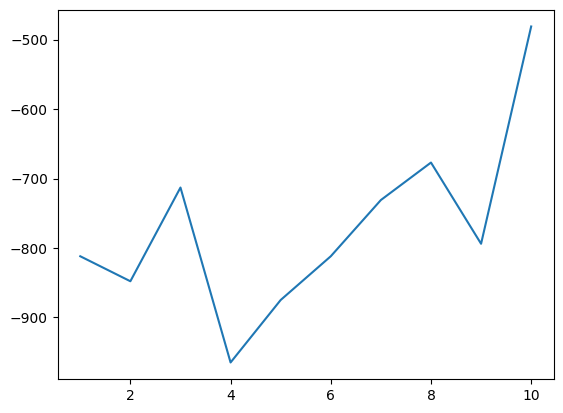

In [9]:
episodes = [i for i in range(1, 11)]
plt.plot(episodes, rewards_table)

Accrording to the documentations pages this is what the numbers are translated to

[Link](https://www.gymlibrary.dev/environments/toy_text/taxi/)

**Actions**

There are 6 discrete deterministic actions:

- 0: move south

- 1: move north

- 2: move east

- 3: move west

- 4: pickup passenger

- 5: drop off passenger

**Rewards**
- -1 per step unless other reward is triggered.

- +20 delivering passenger.

- -10 executing “pickup” and “drop-off” actions illegally.

# Step 2:Implementing Q-Learning to Carry Items

In [10]:
import numpy as np
from tqdm import tqdm

In [11]:
# Initialise Varialbes
disount_factor = 1
learning_rate = 1e-2
init_epsilon = 0.90
n_episodes = 500000
rewards = []

In [45]:
# Take the size of the Action and State space
nS, nA = env.observation_space.n, env.action_space.n

# Create the Q table
Q = np.zeros((nS,nA), dtype=np.float64)

In [46]:
def epsilon_greedy(state, Q, epsilon):
    '''
    This is the action selection function. It will select epsilon times the action that yields the max result
    and 1-epsilon times it will take a random action from the action space
    '''
    if np.random.random() > epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action


In [15]:
for episode in tqdm(range(n_episodes)):
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = epsilon_greedy(state, Q, init_epsilon)
        next_state, reward, done, info = env.step(action)
        target = reward + disount_factor*Q[next_state].max() * int(not done)
        error = target - Q[state][action]
        Q[state][action] += learning_rate*error
        state = next_state
        total_reward += reward
    if episode % 100000 == 0:
        print(f"[EPISODE: {episode}] Total reward: {total_reward}")
    rewards.append(total_reward)

print(f"[EPISODE: {episode}] Total reward: {total_reward}")

  0%|          | 32/500000 [00:00<52:48, 157.79it/s]

[EPISODE: 0] Total reward: -542


 20%|██        | 100318/500000 [01:20<08:06, 820.93it/s]

[EPISODE: 100000] Total reward: -1


 40%|████      | 200184/500000 [02:19<05:35, 892.85it/s]

[EPISODE: 200000] Total reward: -18


 60%|██████    | 300299/500000 [03:18<03:59, 834.01it/s]

[EPISODE: 300000] Total reward: 9


 80%|████████  | 400333/500000 [04:16<02:07, 780.76it/s]

[EPISODE: 400000] Total reward: 6


100%|██████████| 500000/500000 [05:15<00:00, 1587.08it/s]

[EPISODE: 499999] Total reward: -1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


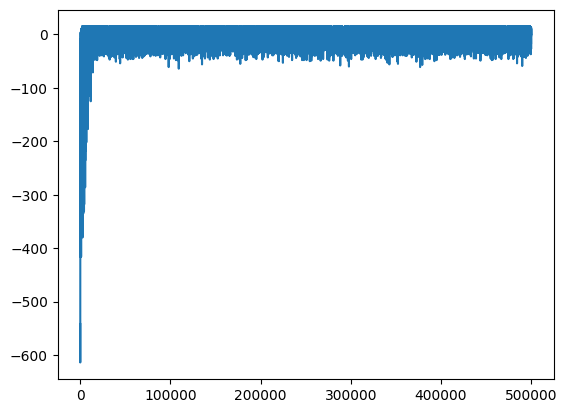

In [51]:
episodes = [e for e in range(n_episodes)]

plt.plot(episodes, rewards)